In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

from tensorflow import keras
from sklearn.utils import class_weight

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, classification_report, roc_curve
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.metrics import precision_recall_curve


from sklearn.tree import export_graphviz 
from IPython.display import Image  
from sklearn import tree

#from graphviz import Source
from sklearn.tree import export_graphviz


import matplotlib.pyplot as plt
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import scikitplot as skplt

A bank term deposit, also known as a fixed deposit or time deposit, is a type of savings account offered by banks and financial institutions. It is a financial product that allows individuals to deposit a specific amount of money for a fixed period, typically ranging from a few months to several years, at an agreed-upon interest rate.

### Key features of a bank term deposit include:

Fixed Term: The money is deposited for a predetermined period, and you cannot withdraw it before the maturity date without incurring penalties. The term can vary from a few months to several years, depending on the terms offered by the bank.

Fixed Interest Rate: The interest rate is usually higher than that of regular savings accounts. The rate is fixed at the time of the deposit, so you are guaranteed to earn a specific amount of interest over the term.

Safety: Bank term deposits are generally considered a safe investment because they are typically insured by government deposit insurance schemes, protecting your funds up to a certain limit in case the bank fails.

Interest Payments: Depending on the terms of the deposit, interest can be paid at regular intervals (e.g., monthly, quarterly, annually) or at the end of the term (upon maturity).

Penalties for Early Withdrawal: If you need to access your funds before the maturity date, you may incur penalties, which can include a reduction in interest earned or, in some cases, the loss of a portion of your principal.

Automatic Renewal: Many banks offer the option to automatically renew the term deposit for the same or a different term if you do not specify otherwise.

Bank term deposits are a popular choice for individuals who want to earn a higher interest rate on their savings while keeping their funds secure. They are often used to save for specific financial goals, such as purchasing a home, funding education, or ensuring a fixed income in retirement. The terms and conditions of bank term deposits can vary between institutions, so it's important to carefully read and understand the terms and interest rates offered by your chosen bank before making a deposit.

# Data Dictionary

Citation Request:
  This dataset is publicly available for research. The details are described in [Moro et al., 2014]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001

  Available at: [pdf] http://dx.doi.org/10.1016/j.dss.2014.03.001
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt

## 1. Title: Bank Marketing (with social/economic context)

## 2. Sources
   Created by: Sérgio Moro (ISCTE-IUL), Paulo Cortez (Univ. Minho) and Paulo Rita (ISCTE-IUL) @ 2014
   
## 3. Past Usage:

  The full dataset (bank-additional-full.csv) was described and analyzed in:

  S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems (2014), doi:10.1016/j.dss.2014.03.001.
 
## 4. Relevant Information:

   This dataset is based on "Bank Marketing" UCI dataset (please check the description at: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing).
   The data is enriched by the addition of five new social and economic features/attributes (national wide indicators from a ~10M population country), published by the Banco de Portugal and publicly available at: https://www.bportugal.pt/estatisticasweb.
   This dataset is almost identical to the one used in [Moro et al., 2014] (it does not include all attributes due to privacy concerns). 
   Using the rminer package and R tool (http://cran.r-project.org/web/packages/rminer/), we found that the addition of the five new social and economic attributes (made available here) lead to substantial improvement in the prediction of a success, even when the duration of the call is not included. Note: the file can be read in R using: d=read.table("bank-additional-full.csv",header=TRUE,sep=";")
   

   Input variables:
   ### bank client data:

   1 - age (numeric)

   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

   5 - default: has credit in default? (categorical: "no","yes","unknown")

   6 - housing: has housing loan? (categorical: "no","yes","unknown")

   7 - loan: has personal loan? (categorical: "no","yes","unknown")

   ### related with the last contact of the current campaign:

   8 - contact: contact communication type (categorical: "cellular","telephone") 

   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

   10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

   11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

   ### other attributes:

   12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

   13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

   14 - previous: number of contacts performed before this campaign and for this client (numeric)

   15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

   ### social and economic context attributes

   16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

   17 - cons.price.idx: consumer price index - monthly indicator (numeric)    

   18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)   

   19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

   20 - nr.employed: number of employees - quarterly indicator (numeric)

   ### target Variable
  
   21 - y - has the client subscribed a term deposit? (binary: "yes","no")

## 8. Missing Attribute Values: 

There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques.

## Importing the Data

In [2]:
dados_bank = pd.read_csv('bank-additional-full.csv', sep=';')
dados_bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [95]:
dados_bank['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [119]:
dados_bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [117]:
4640 / 41188

0.11265417111780131

## EDA

### Missing Data

In [6]:
dados_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [238]:
dados_bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

There is no missing data

## Features Values Analysis

### Visão Geral Variáveis Numéricas

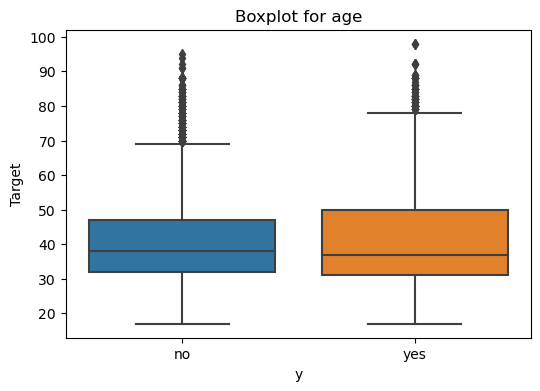

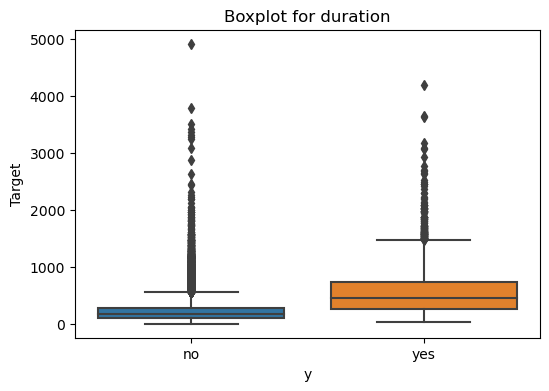

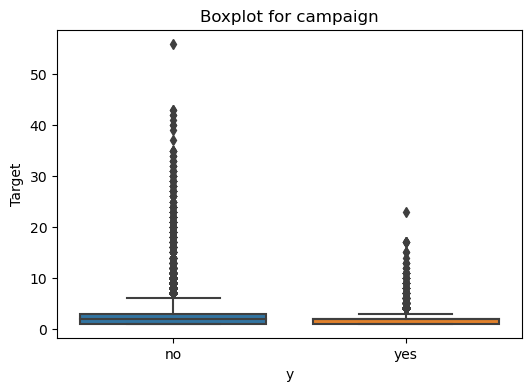

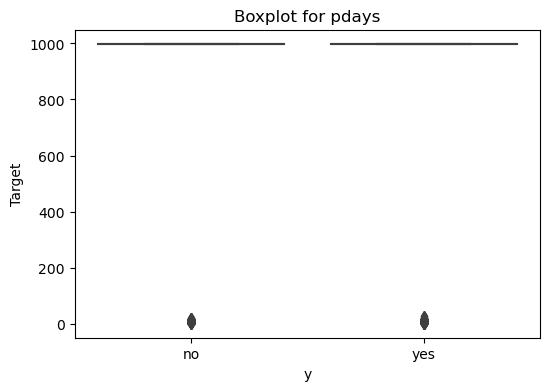

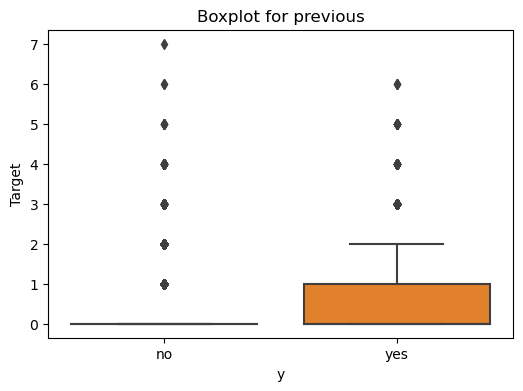

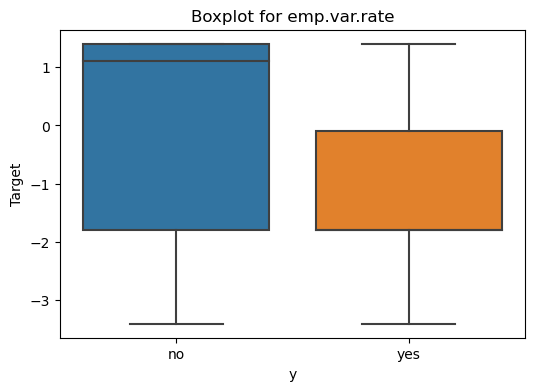

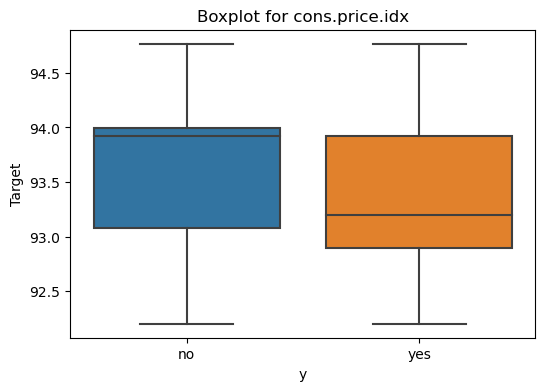

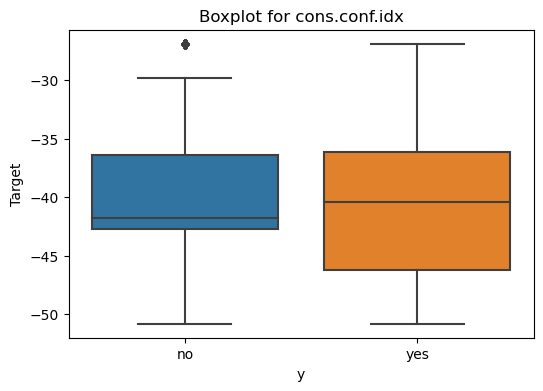

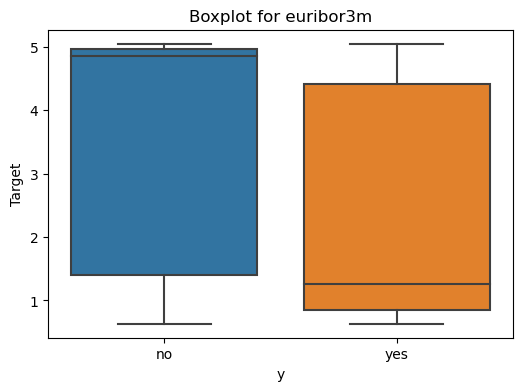

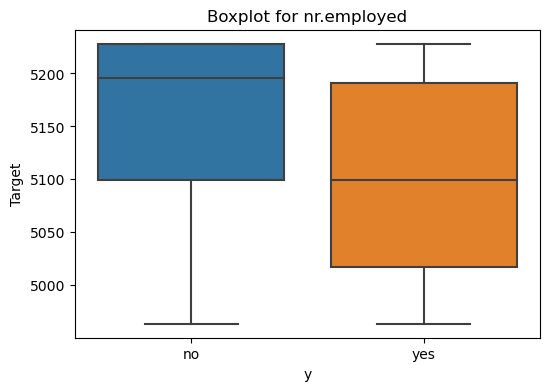

In [237]:
numeric_columns = dados_bank.select_dtypes(include='number')
for column in numeric_columns:
    plt.figure(figsize=(6, 4))  # Set the figure size for each boxplot
    sns.boxplot(x=dados_bank['y'], y=dados_bank[column])
    plt.title(f'Boxplot for {column}')
    plt.ylabel('Target')
    plt.show()

In [245]:
dados_bank[dados_bank['pdays'] == 1]['y'].value_counts()

y
no     18
yes     8
Name: count, dtype: int64

### Correlação

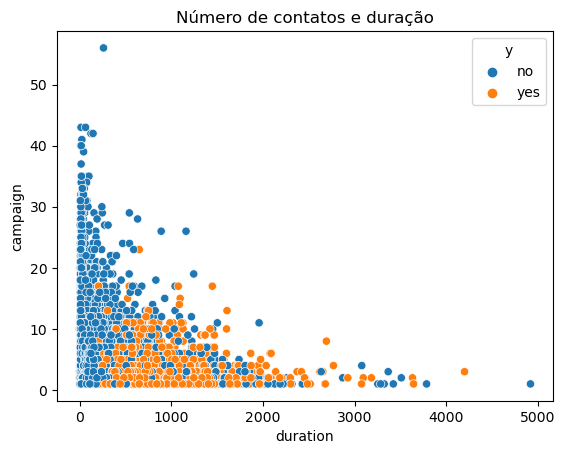

In [67]:
# Create a scatter plot with a hue
sns.scatterplot(data=dados_bank, x='duration', y='campaign', hue='y')

# Display the plot
plt.title('Número de contatos e duração')
plt.show()

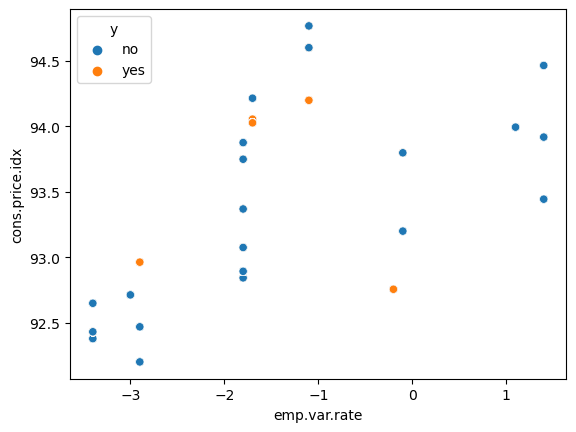

In [271]:
# Create a scatter plot with a hue
sns.scatterplot(data=dados_bank, x='emp.var.rate', y='cons.price.idx', hue='y')

# Display the plot
#plt.title('Número de contados e duração')
plt.show()

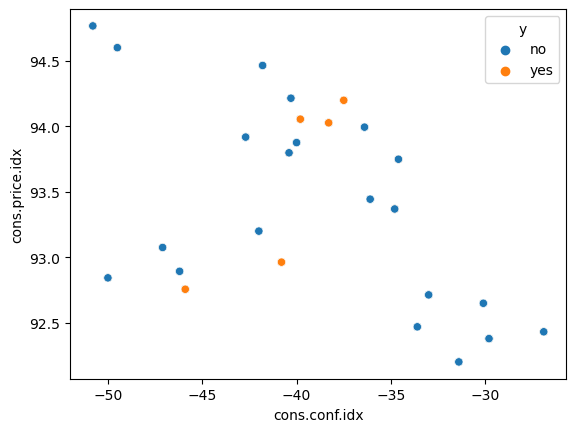

In [272]:
# Create a scatter plot with a hue
sns.scatterplot(data=dados_bank, x='cons.conf.idx', y='cons.price.idx', hue='y')

# Display the plot
#plt.title('Número de contados e duração')
plt.show()

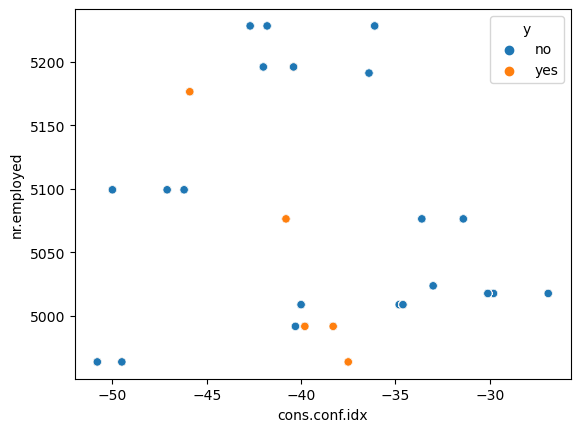

In [274]:
# Create a scatter plot with a hue
sns.scatterplot(data=dados_bank, x='cons.conf.idx', y='nr.employed', hue='y')

# Display the plot
#plt.title('Número de contados e duração')
plt.show()

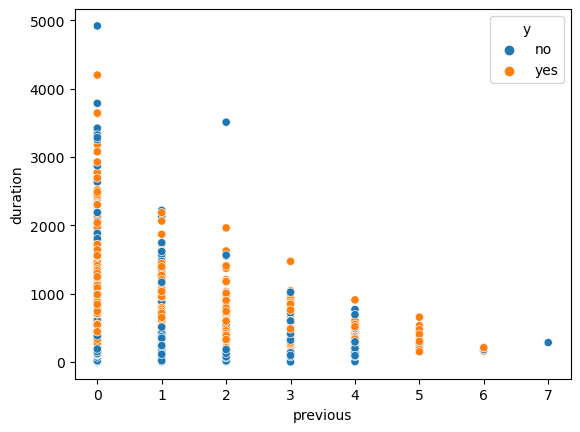

In [278]:
# Create a scatter plot with a hue
sns.scatterplot(data=dados_bank, x='previous', y='duration', hue='y')

# Display the plot
#plt.title('Número de contados e duração')
plt.show()

### EDA Categorical Variables

In [3]:
cat_columns = dados_bank.select_dtypes(include='object')
for column in cat_columns:
    print(f'Column {column} unique values --> {dados_bank[column].unique()}')

Column job unique values --> ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Column marital unique values --> ['married' 'single' 'divorced' 'unknown']
Column education unique values --> ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Column default unique values --> ['no' 'unknown' 'yes']
Column housing unique values --> ['no' 'yes' 'unknown']
Column loan unique values --> ['no' 'yes' 'unknown']
Column contact unique values --> ['telephone' 'cellular']
Column month unique values --> ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Column day_of_week unique values --> ['mon' 'tue' 'wed' 'thu' 'fri']
Column poutcome unique values --> ['nonexistent' 'failure' 'success']
Column y unique values --> ['no' 'yes']


#### JOB

<Axes: xlabel='job', ylabel='Total'>

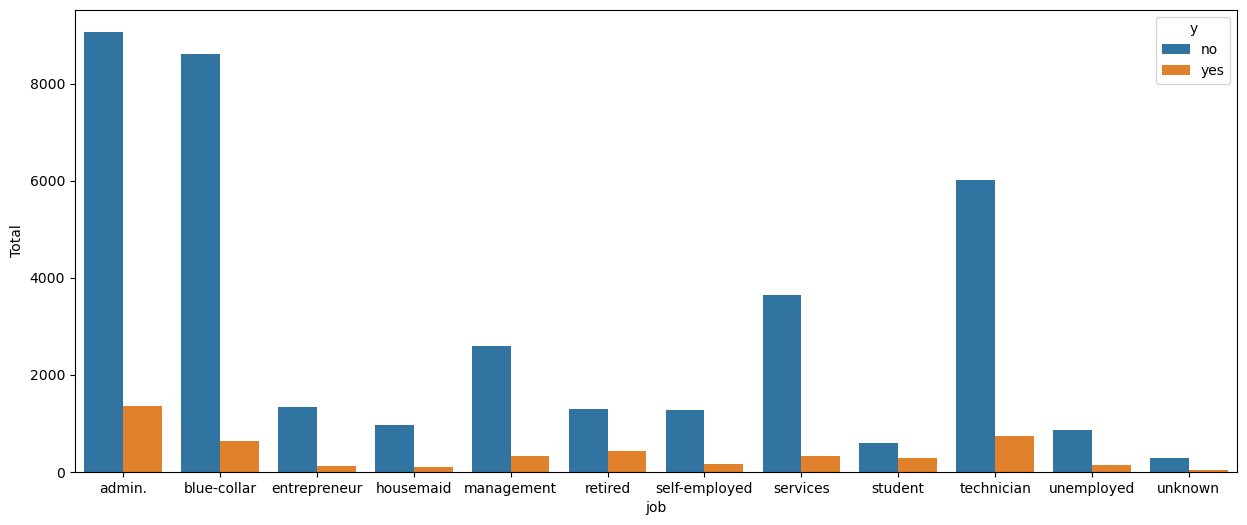

In [251]:
plt.figure(figsize=(15, 6))
job_count=dados_bank.groupby(['job', 'y']).size().reset_index()
job_count.rename(columns={0:'Total'}, inplace=True)
sns.barplot(x=job_count['job'], y=job_count['Total'], hue=job_count['y'])

#### Marital

<Axes: xlabel='marital', ylabel='Total'>

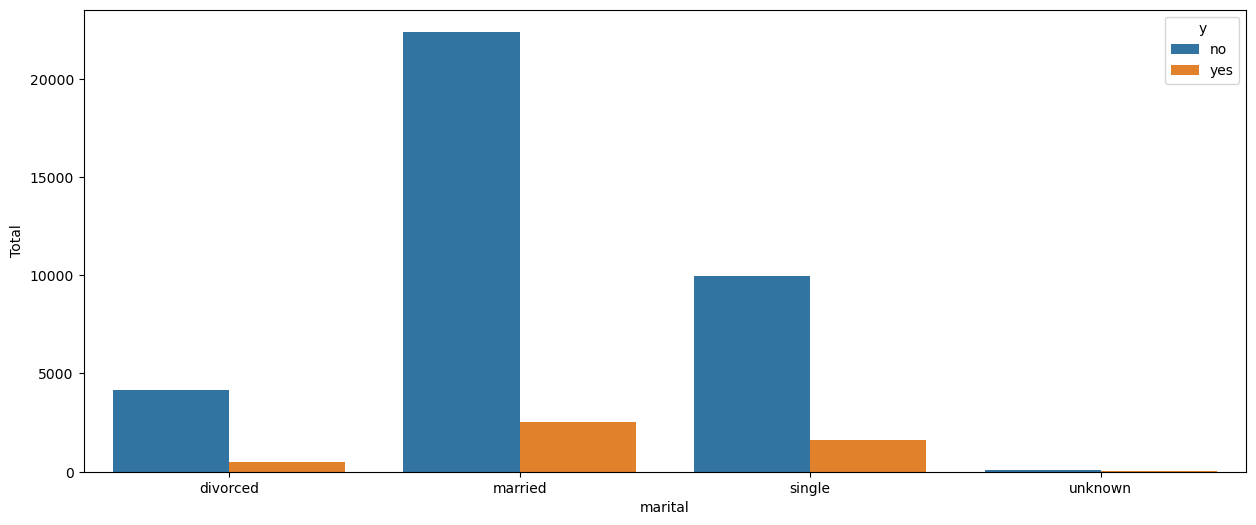

In [253]:
plt.figure(figsize=(15, 6))
marital_count=dados_bank.groupby(['marital', 'y']).size().reset_index()
marital_count.rename(columns={0:'Total'}, inplace=True)
sns.barplot(x=marital_count['marital'], y=marital_count['Total'], hue=marital_count['y'])

#### Education

<Axes: xlabel='education', ylabel='Total'>

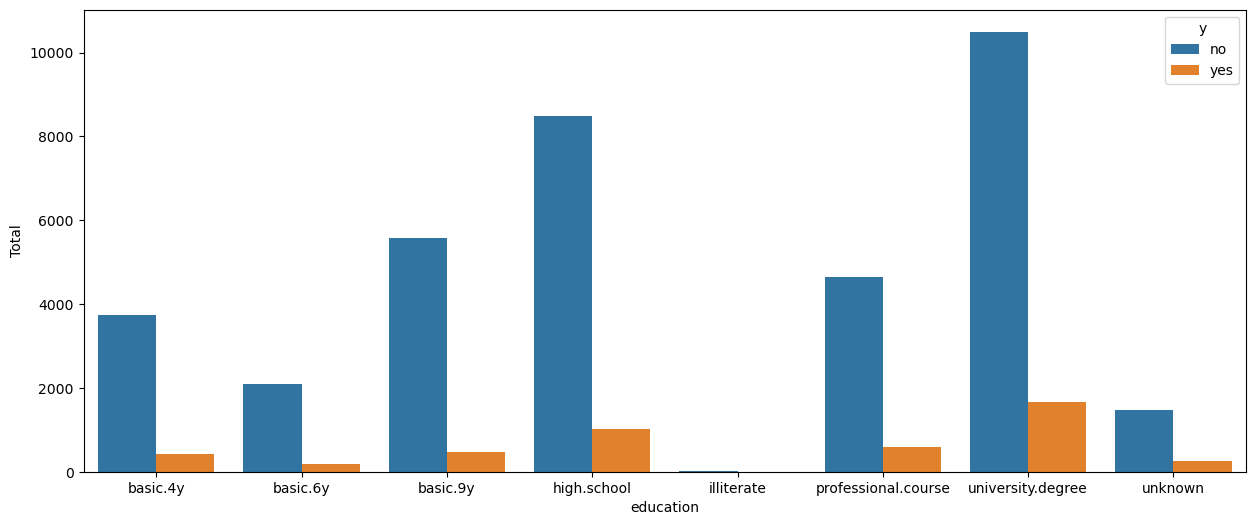

In [254]:
plt.figure(figsize=(15, 6))
education_count=dados_bank.groupby(['education', 'y']).size().reset_index()
education_count.rename(columns={0:'Total'}, inplace=True)
sns.barplot(x=education_count['education'], y=education_count['Total'], hue=education_count['y'])

#### Default

In [260]:
dados_bank[dados_bank['default'] == 'yes']

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
21580,48,technician,married,professional.course,yes,no,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
21581,48,technician,married,professional.course,yes,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
24866,31,unemployed,married,high.school,yes,no,no,cellular,nov,tue,...,2,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no


In [259]:
dados_bank['default'].value_counts()

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

Default = Yes means target NO. However, 3 samples with default of Yes is sufficient

<Axes: xlabel='default', ylabel='Total'>

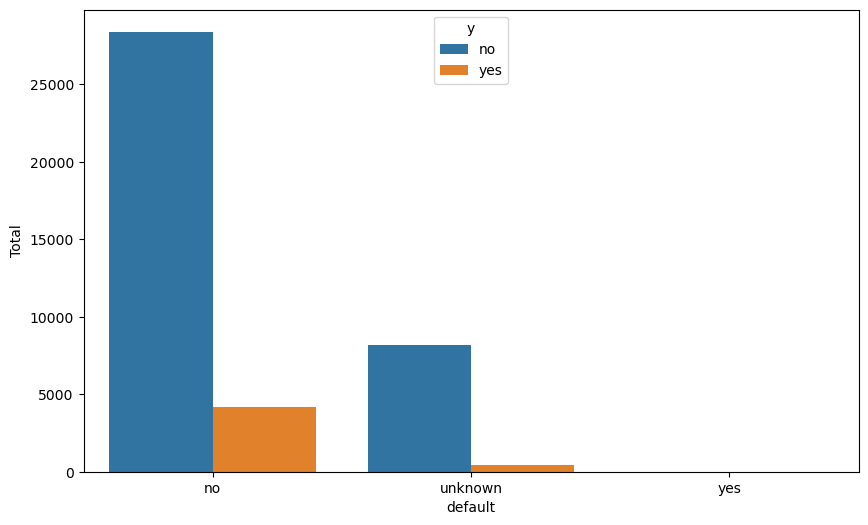

In [255]:
plt.figure(figsize=(10, 6))
default_count=dados_bank.groupby(['default', 'y']).size().reset_index()
default_count.rename(columns={0:'Total'}, inplace=True)
sns.barplot(x=default_count['default'], y=default_count['Total'], hue=default_count['y'])

#### Housing

<Axes: xlabel='housing', ylabel='Total'>

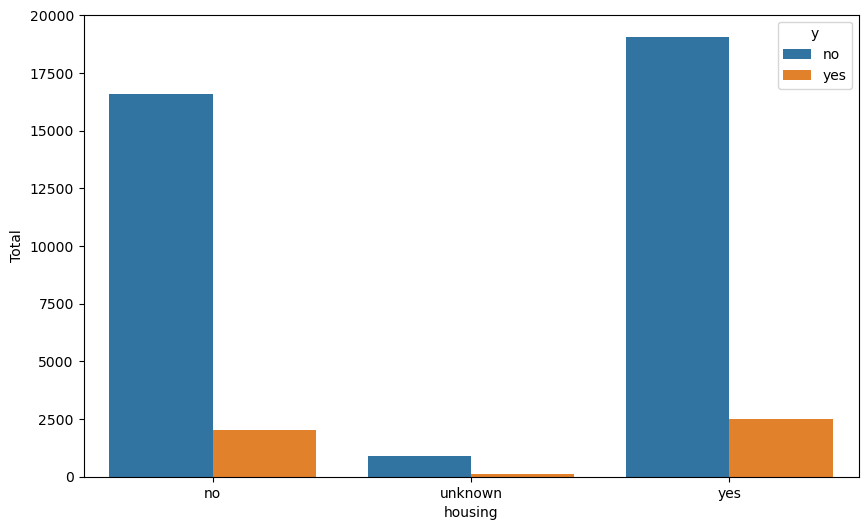

In [261]:
plt.figure(figsize=(10, 6))
housing_count=dados_bank.groupby(['housing', 'y']).size().reset_index()
housing_count.rename(columns={0:'Total'}, inplace=True)
sns.barplot(x=housing_count['housing'], y=housing_count['Total'], hue=housing_count['y'])

#### Loan

<Axes: xlabel='loan', ylabel='Total'>

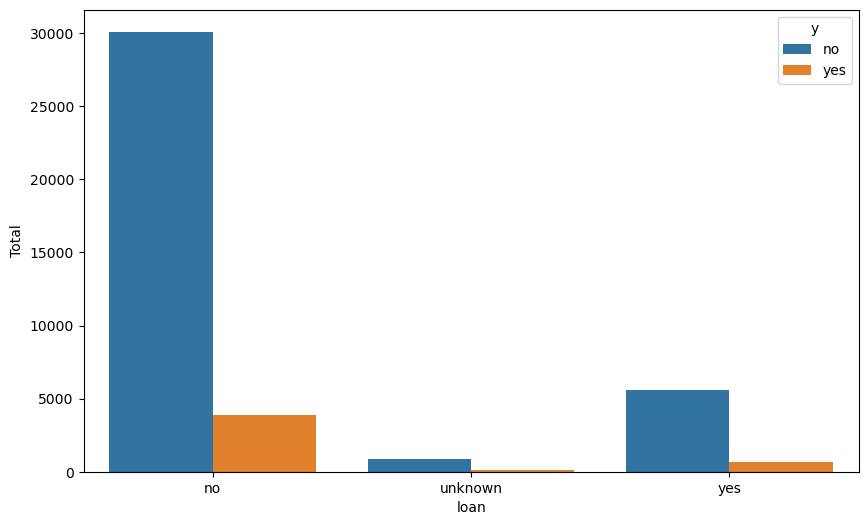

In [263]:
plt.figure(figsize=(10, 6))
loan_count=dados_bank.groupby(['loan', 'y']).size().reset_index()
loan_count.rename(columns={0:'Total'}, inplace=True)
sns.barplot(x=loan_count['loan'], y=loan_count['Total'], hue=loan_count['y'])

#### Contact

<Axes: xlabel='contact', ylabel='Total'>

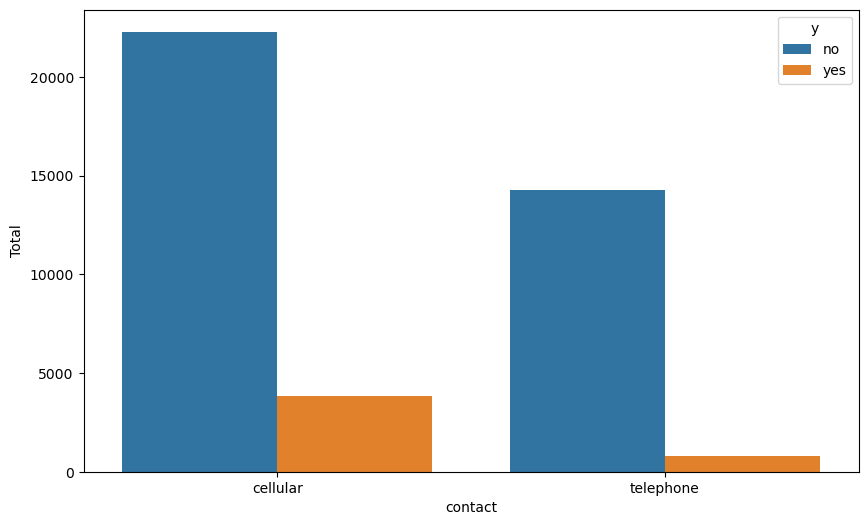

In [264]:
plt.figure(figsize=(10, 6))
contact_count=dados_bank.groupby(['contact', 'y']).size().reset_index()
contact_count.rename(columns={0:'Total'}, inplace=True)
sns.barplot(x=contact_count['contact'], y=contact_count['Total'], hue=contact_count['y'])

#### Month

<Axes: xlabel='month', ylabel='Total'>

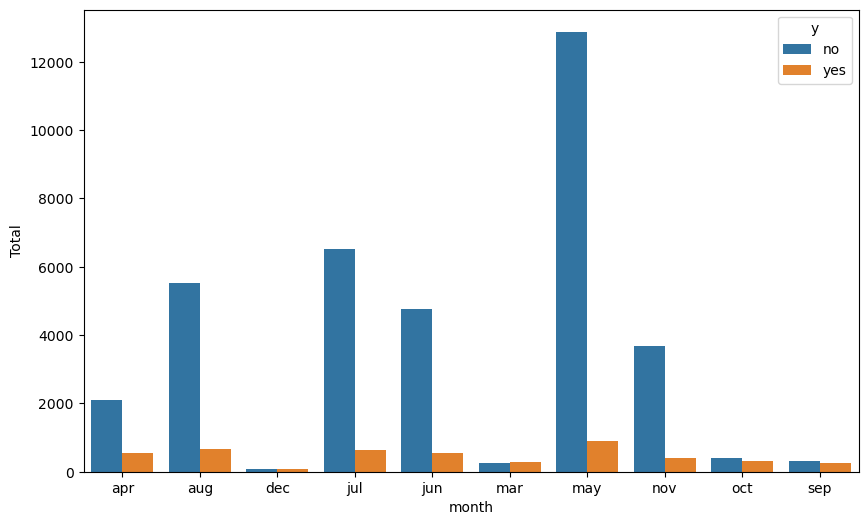

In [265]:
plt.figure(figsize=(10, 6))
month_count=dados_bank.groupby(['month', 'y']).size().reset_index()
month_count.rename(columns={0:'Total'}, inplace=True)
sns.barplot(x=month_count['month'], y=month_count['Total'], hue=month_count['y'])

#### Day of Week

<Axes: xlabel='day_of_week', ylabel='Total'>

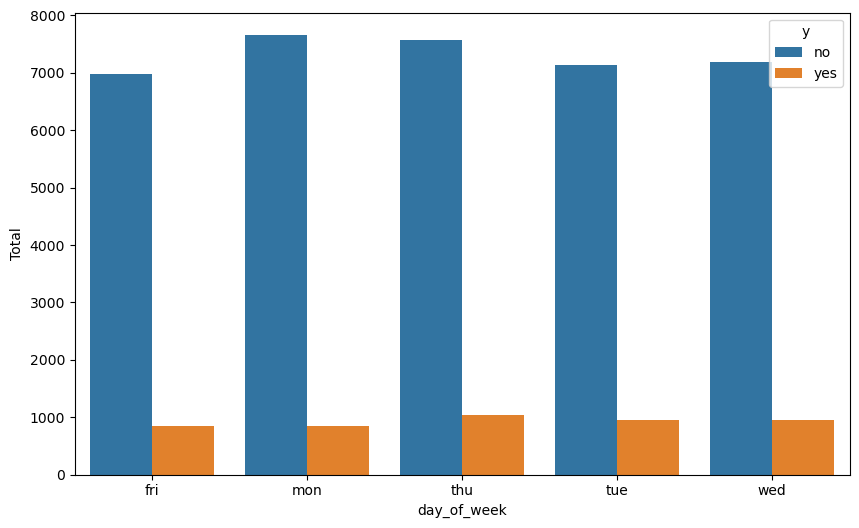

In [267]:
plt.figure(figsize=(10, 6))
week_count=dados_bank.groupby(['day_of_week', 'y']).size().reset_index()
week_count.rename(columns={0:'Total'}, inplace=True)
sns.barplot(x=week_count['day_of_week'], y=week_count['Total'], hue=week_count['y'])

#### Poutcome

Text(0.5, 1.0, 'Resultado campanha anterior')

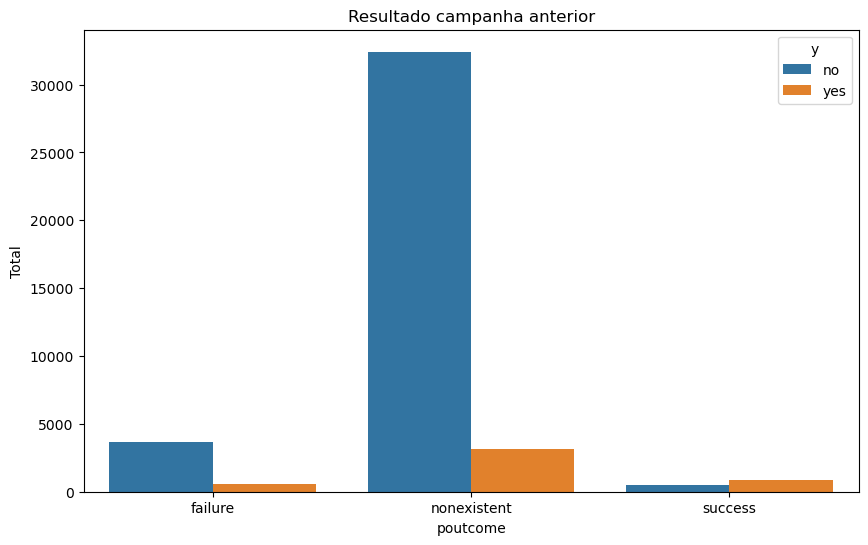

In [69]:
plt.figure(figsize=(10, 6))
poutcome_count=dados_bank.groupby(['poutcome', 'y']).size().reset_index()
poutcome_count.rename(columns={0:'Total'}, inplace=True)
sns.barplot(x=poutcome_count['poutcome'], y=poutcome_count['Total'], hue=poutcome_count['y'])
plt.title('Resultado campanha anterior')

## Data Preparation

In [61]:
df = dados_bank.copy()

var_expl = [
            'age', 
            'job', 
            'marital', 
            'housing', 
            'month', 
            'day_of_week', 
            #'education',
            #'duration', 
            'campaign', 
            'pdays',
            'previous', 
            'poutcome', 
            'emp.var.rate', 
            'cons.price.idx',
            'cons.conf.idx', 
            'euribor3m', 
            'nr.employed'
]

var_resp = 'y'

df_treino, df_teste = train_test_split(df, test_size = 0.3, random_state = 1)

x_treino = df_treino[var_expl].copy()
y_treino = df_treino[var_resp].copy()

x_teste = df_teste[var_expl].copy()
y_teste = df_teste[var_resp].copy()

tipo = x_treino.dtypes
var_expl_str = []
var_expl_num = []
for coluna in x_treino.columns.to_list():
  if tipo[coluna] == 'object' :
    var_expl_str.append(coluna)
  else:
    var_expl_num.append(coluna)

var_expl_str_index = [x_treino.columns.get_loc(c) for c in var_expl_str if c in x_treino]
var_expl_num_index = [x_treino.columns.get_loc(c) for c in var_expl_num if c in x_treino]

var_num = ['pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

## Decision Tree

In [62]:
%%time

order_education = ['unknown', 'illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school','professional.course', 'university.degree' ]
order_month = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
order_day_of_week = ['mon', 'tue', 'wed', 'thu', 'fri']

pipe_education = Pipeline(steps = [
    ('trata_education', OrdinalEncoder(categories = [order_education]))
])

pipe_month = Pipeline(steps = [
    ('trata_month', OrdinalEncoder(categories = [order_month])),
])

pipe_day_week = Pipeline(steps = [
    ('trata_day_week', OrdinalEncoder(categories = [order_day_of_week]))
])

pipe_categories = Pipeline(steps = [
    ('label_enco', OrdinalEncoder())
])


pipe_num = Pipeline(steps = [
    ('scaler', StandardScaler())
])

pipe_selecao = ColumnTransformer(transformers = [
    ('pipe_month', pipe_month, ['month']),
    ('pipe_day_week', pipe_day_week, ['day_of_week']),
    ('pipe_cat', pipe_categories, ['job', 'marital', 'housing', 'poutcome']),
     ('pipe_num', pipe_num, var_num)],
    remainder='passthrough'
)

CPU times: total: 0 ns
Wall time: 0 ns


In [63]:
# Arvore com hiperparametros padrão causa Overfitting

label_mapping = {'no': 0, 'yes': 1}

# Map labels to binary values
y_teste = [label_mapping[label] for label in y_teste]

### Light GBM

In [64]:

from lightgbm import LGBMClassifier

modelo_1 = LGBMClassifier(
    random_state = 1,
    learning_rate = 0.04173184577979624,
    max_depth = 4,
    n_estimators = 363,
    num_leaves = 11
)



pipeline = Pipeline(steps = [
    ('preproc_1', pipe_selecao),
    ('modelo', modelo_1)
])


pipeline.fit(x_treino, y_treino)
y_pred_treino_lgb_1 = pipeline.predict_proba(x_treino)[:, 1]
y_pred_teste_lgb_1 = pipeline.predict_proba(x_teste)[:, 1]

print('ROC AUC Treino: ', roc_auc_score(y_treino, y_pred_treino_lgb_1))
print('ROC AUC Teste: ', roc_auc_score(y_teste, y_pred_teste_lgb_1))

# Define your threshold
threshold = 0.06 # You can set your threshold as needed

# Create a new binary variable (0 or 1) based on the threshold
binary_variable = [1 if prob >= threshold else 0 for prob in y_pred_teste_lgb_1]

# Print the binary variable
accuracy = accuracy_score(y_teste, binary_variable)
conf_matrix = confusion_matrix(y_teste, binary_variable)
class_report = classification_report(y_teste, binary_variable)

print(class_report)

[LightGBM] [Info] Number of positive: 3227, number of negative: 25604
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001204 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 376
[LightGBM] [Info] Number of data points in the train set: 28831, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111928 -> initscore=-2.071196
[LightGBM] [Info] Start training from score -2.071196
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

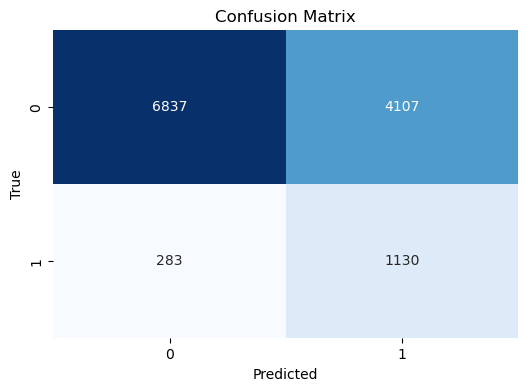

In [8]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Modelo 1

In [21]:



modelo_1 = DecisionTreeClassifier()


pipeline = Pipeline(steps = [
    ('preproc_1', pipe_selecao),
    ('modelo', modelo_1)
])


pipeline.fit(x_treino, y_treino)
y_pred_treino_dt_1 = pipeline.predict_proba(x_treino)[:, 1]
y_pred_teste_dt_1 = pipeline.predict_proba(x_teste)[:, 1]

print('ROC AUC Treino: ', roc_auc_score(y_treino, y_pred_treino_dt_1))
print('ROC AUC Teste: ', roc_auc_score(y_teste, y_pred_teste_dt_1))

# Arvore com hiperparametros padrão causa Overfitting

#label_mapping = {'no': 0, 'yes': 1}

# Map labels to binary values
#y_true = [label_mapping[label] for label in y_teste]

# Define your threshold
threshold = 0.06 # You can set your threshold as needed

# Create a new binary variable (0 or 1) based on the threshold
binary_variable = [1 if prob >= threshold else 0 for prob in y_pred_teste_dt_1]

# Print the binary variable
accuracy = accuracy_score(y_teste, binary_variable)
conf_matrix = confusion_matrix(y_teste, binary_variable)
class_report = classification_report(y_teste, binary_variable)

print(class_report)

ROC AUC Treino:  0.9995008660184265
ROC AUC Teste:  0.6232033607106939
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     10944
           1       0.30      0.35      0.32      1413

    accuracy                           0.83     12357
   macro avg       0.60      0.62      0.61     12357
weighted avg       0.84      0.83      0.84     12357



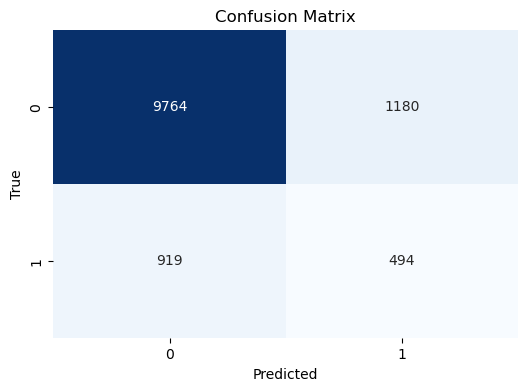

In [22]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [11]:
#label_mapping = {'no': 0, 'yes': 1}

# Map labels to binary values
y_true = [label_mapping[label] for label in y_treino]


# Create a new binary variable (0 or 1) based on the threshold
binary_variable_2 = [1 if prob >= 0.5 else 0 for prob in y_pred_treino_dt_1]
class_report = classification_report(y_true, binary_variable_2)

print(class_report)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     25604
           1       0.93      0.98      0.96      3227

    accuracy                           0.99     28831
   macro avg       0.97      0.99      0.98     28831
weighted avg       0.99      0.99      0.99     28831



### Modelo 2

In [23]:

modelo_2 = DecisionTreeClassifier(min_samples_leaf = 3, max_depth = 8, min_samples_split = 2,  criterion='entropy')


pipeline = Pipeline(steps = [
    ('preproc_1', pipe_selecao),
    ('modelo', modelo_2)
])


pipeline.fit(x_treino, y_treino)
y_pred_treino_dt_2 = pipeline.predict_proba(x_treino)[:, 1]
y_pred_teste_dt_2 = pipeline.predict_proba(x_teste)[:, 1]

print('ROC AUC Treino: ', roc_auc_score(y_treino, y_pred_treino_dt_2))
print('ROC AUC Teste: ', roc_auc_score(y_teste, y_pred_teste_dt_2))

# Arvore com hiperparametros padrão causa Overfitting

#label_mapping = {'no': 0, 'yes': 1}

# Map labels to binary values
#y_true = [label_mapping[label] for label in y_teste]

# Define your threshold
threshold = 0.06 # You can set your threshold as needed

# Create a new binary variable (0 or 1) based on the threshold
binary_variable = [1 if prob >= threshold else 0 for prob in y_pred_teste_dt_2]

# Print the binary variable
accuracy = accuracy_score(y_teste, binary_variable)
conf_matrix = confusion_matrix(y_teste, binary_variable)
class_report = classification_report(y_teste, binary_variable)

print(class_report)

ROC AUC Treino:  0.8036697291788011
ROC AUC Teste:  0.7732492547791396
              precision    recall  f1-score   support

           0       0.96      0.33      0.49     10944
           1       0.15      0.89      0.25      1413

    accuracy                           0.39     12357
   macro avg       0.55      0.61      0.37     12357
weighted avg       0.87      0.39      0.46     12357



In [13]:
aux = pd.DataFrame()

aux['pred'] = pd.Series(y_pred_teste_dt_2.flatten()) 
aux['y'] = y_teste
aux[aux['y'] == 0].describe()


,pred,y
count,10944.000000,10944.0
mean,0.086661,0.0
std,0.119204,0.0
min,0.000000,0.0
25%,0.041075,0.0
50%,0.062645,0.0
75%,0.062645,0.0
max,1.000000,0.0


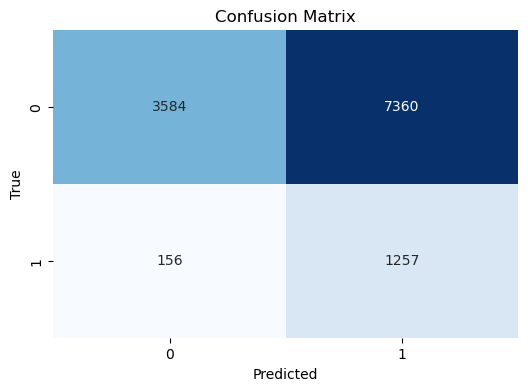

In [24]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Modelo 3

In [25]:

modelo_3 = DecisionTreeClassifier(min_samples_leaf = 4, max_depth = 9, min_samples_split = 3,  criterion='entropy')


pipeline = Pipeline(steps = [
    ('preproc_1', pipe_selecao),
    ('modelo', modelo_3)
])


pipeline.fit(x_treino, y_treino)
y_pred_treino_dt_3 = pipeline.predict_proba(x_treino)[:, 1]
y_pred_teste_dt_3 = pipeline.predict_proba(x_teste)[:, 1]

print('ROC AUC Treino: ', roc_auc_score(y_treino, y_pred_treino_dt_3))
print('ROC AUC Teste: ', roc_auc_score(y_teste, y_pred_teste_dt_3))

# Arvore com hiperparametros padrão causa Overfitting

#label_mapping = {'no': 0, 'yes': 1}

# Map labels to binary values
#y_true = [label_mapping[label] for label in y_teste]

# Define your threshold
threshold = 0.06 # You can set your threshold as needed

# Create a new binary variable (0 or 1) based on the threshold
binary_variable = [1 if prob >= threshold else 0 for prob in y_pred_teste_dt_3]

# Print the binary variable
accuracy = accuracy_score(y_teste, binary_variable)
conf_matrix = confusion_matrix(y_teste, binary_variable)
class_report = classification_report(y_teste, binary_variable)

print(class_report)

ROC AUC Treino:  0.8140215807231468
ROC AUC Teste:  0.7681157086659797
              precision    recall  f1-score   support

           0       0.95      0.62      0.75     10944
           1       0.20      0.74      0.32      1413

    accuracy                           0.63     12357
   macro avg       0.57      0.68      0.53     12357
weighted avg       0.86      0.63      0.70     12357



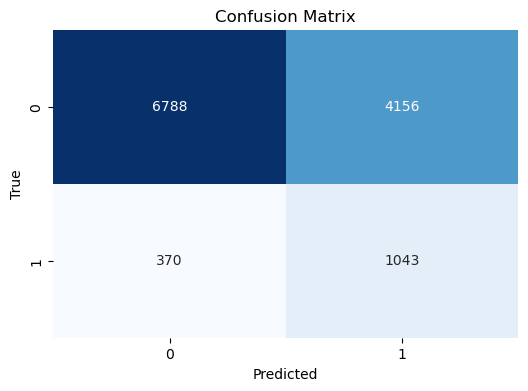

In [26]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Modelo 4

In [27]:

modelo_4 = DecisionTreeClassifier(min_samples_leaf = 4, max_depth = 5, min_samples_split = 3,  criterion='log_loss')


pipeline = Pipeline(steps = [
    ('preproc_1', pipe_selecao),
    ('modelo', modelo_4)
])

pipeline.fit(x_treino, y_treino)
y_pred_treino_dt_4 = pipeline.predict_proba(x_treino)[:, 1]
y_pred_teste_dt_4 = pipeline.predict_proba(x_teste)[:, 1]

print('ROC AUC Treino: ', roc_auc_score(y_treino, y_pred_treino_dt_4))
print('ROC AUC Teste: ', roc_auc_score(y_teste, y_pred_teste_dt_4))

# Arvore com hiperparametros padrão causa Overfitting

#label_mapping = {'no': 0, 'yes': 1}

# Map labels to binary values
#y_true = [label_mapping[label] for label in y_teste]

# Define your threshold
threshold = 0.06# You can set your threshold as needed

# Create a new binary variable (0 or 1) based on the threshold
binary_variable = [1 if prob >= threshold else 0 for prob in y_pred_teste_dt_4]

# Print the binary variable
accuracy = accuracy_score(y_teste, binary_variable)
conf_matrix = confusion_matrix(y_teste, binary_variable)
class_report = classification_report(y_teste, binary_variable)

print(class_report)

ROC AUC Treino:  0.7834800165104355
ROC AUC Teste:  0.7890935724248104
              precision    recall  f1-score   support

           0       0.97      0.33      0.49     10944
           1       0.15      0.91      0.26      1413

    accuracy                           0.39     12357
   macro avg       0.56      0.62      0.37     12357
weighted avg       0.87      0.39      0.46     12357



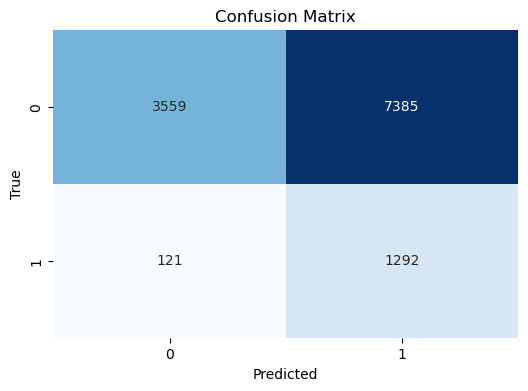

In [28]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Modelo 5 - Escolhido

In [65]:

modelo_otimo = DecisionTreeClassifier(min_samples_leaf = 8, max_depth = 6, min_samples_split = 4,  criterion='entropy')


pipeline = Pipeline(steps = [
    ('preproc_1', pipe_selecao),
    ('modelo', modelo_otimo)
])


pipeline.fit(x_treino, y_treino)
y_pred_treino_dt_5 = pipeline.predict_proba(x_treino)[:, 1]
y_pred_teste_dt_5 = pipeline.predict_proba(x_teste)[:, 1]

print('ROC AUC Treino: ', roc_auc_score(y_treino, y_pred_treino_dt_5))
print('ROC AUC Teste: ', roc_auc_score(y_teste, y_pred_teste_dt_5))

# Arvore com hiperparametros padrão causa Overfitting

#label_mapping = {'no': 0, 'yes': 1}

# Map labels to binary values
#y_true = [label_mapping[label] for label in y_teste]

# Define your threshold
threshold = 0.06 # You can set your threshold as needed

# Create a new binary variable (0 or 1) based on the threshold
binary_variable = [1 if prob >= threshold else 0 for prob in y_pred_teste_dt_5]

# Print the binary variable
accuracy = accuracy_score(y_teste, binary_variable)
conf_matrix = confusion_matrix(y_teste, binary_variable)
class_report = classification_report(y_teste, binary_variable)

print(class_report)

ROC AUC Treino:  0.7890855656801765
ROC AUC Teste:  0.7897776507720704
              precision    recall  f1-score   support

           0       0.97      0.33      0.49     10944
           1       0.15      0.91      0.26      1413

    accuracy                           0.40     12357
   macro avg       0.56      0.62      0.37     12357
weighted avg       0.87      0.40      0.46     12357



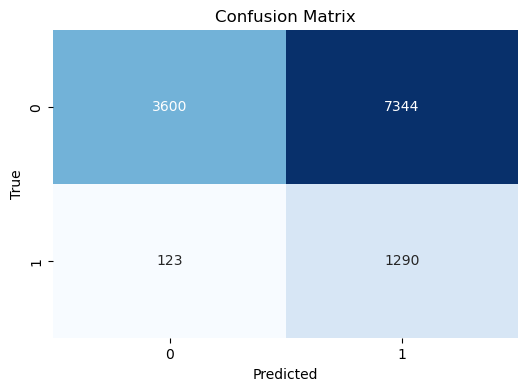

In [66]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [23]:
  # visualization
  export_graphviz(
        modelo,
        out_file="tree.dot",
        feature_names = pipeline.feature_names_in_,
        class_names=['yes', 'no'],
        rounded=True,
        filled=True
    )
  
  view = Source.from_file("tree.dot")
  view.render('tree', format='jpg',view=True)
  view.view()

'tree.pdf'

In [31]:
# Get feature importances
feature_importances = modelo_otimo.feature_importances_

# Pair feature names with importances
feature_importance_dict = dict(zip(pipeline.feature_names_in_, feature_importances))

features_importance = pd.DataFrame([feature_importance_dict]).T.rename(columns = {0: 'feature_importance'}).sort_values(by='feature_importance', ascending=False)
features_importance

,feature_importance
cons.conf.idx,0.648947
age,0.095378
campaign,0.089675
cons.price.idx,0.053589
euribor3m,0.029185
poutcome,0.028876
emp.var.rate,0.018017
job,0.012109
nr.employed,0.009642
day_of_week,0.007773


### Comparação Curva AUC Árvores

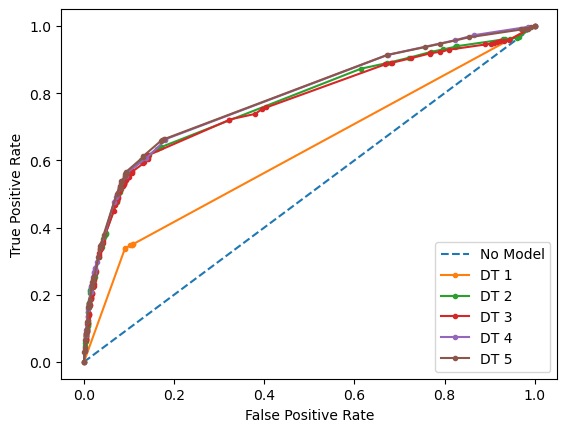

In [32]:

 
dc_auc_1 = roc_auc_score(y_teste, y_pred_teste_dt_1)
dc_auc_2 = roc_auc_score(y_teste, y_pred_teste_dt_2)
dc_auc_3 = roc_auc_score(y_teste, y_pred_teste_dt_3)
dc_auc_4 = roc_auc_score(y_teste, y_pred_teste_dt_4)
dc_auc_5 = roc_auc_score(y_teste, y_pred_teste_dt_5)
ns_probs = [0 for _ in range(len(y_teste))]
# summarize scores
#print('Neural Network: ROC AUC=%.3f' % (nn_auc))
#print('Decision Tree: ROC AUC=%.3f' % (dc_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_teste, ns_probs)

dt_fpr_1, dt_tpr_1, _ = roc_curve(y_teste, y_pred_teste_dt_1)
dt_fpr_2, dt_tpr_2, _ = roc_curve(y_teste, y_pred_teste_dt_2)
dt_fpr_3, dt_tpr_3, _ = roc_curve(y_teste, y_pred_teste_dt_3)
dt_fpr_4, dt_tpr_4, _ = roc_curve(y_teste, y_pred_teste_dt_4)
dt_fpr_5, dt_tpr_5, _ = roc_curve(y_teste, y_pred_teste_dt_5)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Model')
plt.plot(dt_fpr_1, dt_tpr_1, marker='.', label='DT 1')
plt.plot(dt_fpr_2, dt_tpr_2, marker='.', label='DT 2')
plt.plot(dt_fpr_3, dt_tpr_3, marker='.', label='DT 3')
plt.plot(dt_fpr_4, dt_tpr_4, marker='.', label='DT 4')
plt.plot(dt_fpr_5, dt_tpr_5, marker='.', label='DT 5')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

## Neural Network

In [33]:
dados_bank_2 = dados_bank.copy()
df = dados_bank_2.copy()

var_expl = [
            'age', 
            'job', 
            'marital', 
            'housing', 
            'month', 
            'day_of_week', 
            #'duration', 
            'campaign', 
            'pdays',
            'previous', 
            'poutcome', 
            'emp.var.rate', 
            'cons.price.idx',
            'cons.conf.idx', 
            'euribor3m', 
            'nr.employed'
]


var_resp = 'y'

# Create a mapping dictionary
mapping = {'yes': 1, 'no': 0}

# Use the replace method to replace values
df['y'] = df['y'].replace(mapping)

df_treino, df_teste = train_test_split(df, test_size = 0.3, random_state = 1)

x_treino_2 = df_treino[var_expl].copy()
y_treino_2 = df_treino[var_resp].copy()

x_teste_2 = df_teste[var_expl].copy()
y_teste_2 = df_teste[var_resp].copy()
# Specify the columns to encode with custom category orders
columns_with_custom_order = {
    'month': ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
    'day_of_week': ['mon', 'tue', 'wed', 'thu', 'fri']
}

# Specify the columns to encode without custom category orders
columns_without_custom_order = ['job', 'marital', 'housing', 'poutcome']

# Create a dictionary of OrdinalEncoders for columns with custom order
encoders_with_custom_order = {col: OrdinalEncoder(categories=[columns_with_custom_order[col]]) for col in columns_with_custom_order}

# Apply each encoder to the respective column
for col, encoder in encoders_with_custom_order.items():
    x_treino_2[col] = encoder.fit_transform(x_treino_2[[col]])
    x_teste_2[col] = encoder.transform(x_teste_2[[col]])


# Create a single OrdinalEncoder instance for columns without custom order
encoder_without_custom_order = OrdinalEncoder()
x_treino_2[columns_without_custom_order] = encoder_without_custom_order.fit_transform(x_treino_2[columns_without_custom_order])
x_teste_2[columns_without_custom_order] = encoder_without_custom_order.transform(x_teste_2[columns_without_custom_order])

scaler = StandardScaler()

var_num
x_treino_2[var_num] = scaler.fit_transform(x_treino_2[var_num])
x_teste_2[var_num] = scaler.transform(x_teste_2[var_num])



In [ ]:
#sklearn_weights = class_weight.compute_class_weight(class_weight  = 'balanced', 
#                                                   classes = np.unique(y_treino_2),
#                                                   y = y_treino_2)
#sklearn_weights = dict(enumerate(sklearn_weights))
#sklearn_weights

### Rede 1

In [34]:
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(16, activation='relu', input_dim=len(x_treino_2.columns)),
  #tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

opt = keras.optimizers.Adam(learning_rate=0.01)

#opt = SGD(lr=0.001)

model_1.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_1.fit(x_treino_2, y_treino_2, batch_size=100, epochs=50)#class_weight=sklearn_weights)#, callbacks=[myCallback()])

#model.evaluate(x_teste_2,  y_teste_2, verbose=2)

Epoch 1/50
289/289 [==============================] - 1s 1ms/step - loss: 0.3146 - accuracy: 0.8936
Epoch 2/50
289/289 [==============================] - 0s 1ms/step - loss: 0.2980 - accuracy: 0.8959
Epoch 3/50
289/289 [==============================] - 0s 1ms/step - loss: 0.2987 - accuracy: 0.8961
Epoch 4/50
289/289 [==============================] - 0s 1ms/step - loss: 0.2952 - accuracy: 0.8979
Epoch 5/50
289/289 [==============================] - 0s 1ms/step - loss: 0.2970 - accuracy: 0.8969
Epoch 6/50
289/289 [==============================] - 0s 1ms/step - loss: 0.2937 - accuracy: 0.8984
Epoch 7/50
289/289 [==============================] - 0s 1ms/step - loss: 0.2932 - accuracy: 0.8979
Epoch 8/50
289/289 [==============================] - 0s 1ms/step - loss: 0.2917 - accuracy: 0.8995
Epoch 9/50
289/289 [==============================] - 0s 1ms/step - loss: 0.2902 - accuracy: 0.8988
Epoch 10/50
289/289 [==============================] - 0s 1ms/step - loss: 0.2942 - accuracy: 0.8970

In [35]:
limiar = 0.07
y_pred_teste_proba_1 = model_1.predict(x_teste_2)
y_pred_teste_1 = [0 if val < limiar else 1 for val in y_pred_teste_proba_1]

y_pred_treino_proba_1 = model_1.predict(x_treino_2)
y_pred_treino_1 = [0 if val < limiar else 1 for val in y_pred_treino_proba_1]

print('ROC AUC Treino: ', roc_auc_score(y_treino_2, y_pred_treino_proba_1))
print('ROC AUC Teste: ', roc_auc_score(y_teste_2, y_pred_teste_proba_1))

901/901 [==============================] - 1s 795us/step
ROC AUC Treino:  0.7904456892896199
ROC AUC Teste:  0.7993081874966372


In [36]:
# Print the binary variable
accuracy = accuracy_score(y_treino_2, y_pred_treino_1)
conf_matrix = confusion_matrix(y_treino_2, y_pred_treino_1)
class_report = classification_report(y_treino_2, y_pred_treino_1)
print('TREINO')
print(class_report)

TREINO
              precision    recall  f1-score   support

           0       0.95      0.79      0.86     25604
           1       0.29      0.68      0.40      3227

    accuracy                           0.77     28831
   macro avg       0.62      0.73      0.63     28831
weighted avg       0.88      0.77      0.81     28831



TESTE
              precision    recall  f1-score   support

           0       0.95      0.79      0.86     10944
           1       0.30      0.69      0.42      1413

    accuracy                           0.78     12357
   macro avg       0.63      0.74      0.64     12357
weighted avg       0.88      0.78      0.81     12357



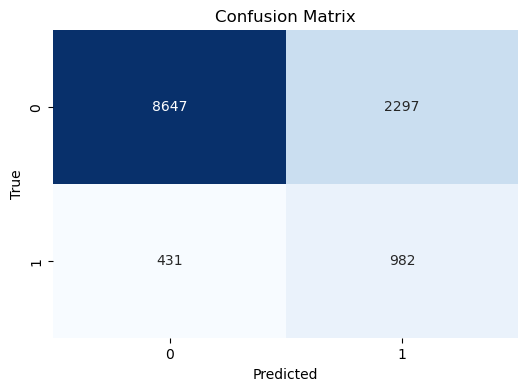

In [37]:
# Print the binary variable
accuracy = accuracy_score(y_teste_2, y_pred_teste_1)
conf_matrix = confusion_matrix(y_teste_2, y_pred_teste_1)
class_report = classification_report(y_teste_2, y_pred_teste_1)
print('TESTE')
print(class_report)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Rede 2

In [38]:
model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(32, activation='relu', input_dim=len(x_treino_2.columns)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

opt = keras.optimizers.Adam(learning_rate=0.002)

#opt = SGD(lr=0.001)

model_2.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_2.fit(x_treino_2, y_treino_2, batch_size=100, epochs=50)#class_weight=sklearn_weights)#, callbacks=[myCallback()])

#model.evaluate(x_teste_2,  y_teste_2, verbose=2)


Epoch 1/50
289/289 [==============================] - 1s 1ms/step - loss: 0.3086 - accuracy: 0.8951
Epoch 2/50
289/289 [==============================] - 0s 1ms/step - loss: 0.2958 - accuracy: 0.8981
Epoch 3/50
289/289 [==============================] - 0s 1ms/step - loss: 0.2923 - accuracy: 0.8981
Epoch 4/50
289/289 [==============================] - 0s 2ms/step - loss: 0.2889 - accuracy: 0.8979
Epoch 5/50
289/289 [==============================] - 0s 2ms/step - loss: 0.2864 - accuracy: 0.8991
Epoch 6/50
289/289 [==============================] - 0s 1ms/step - loss: 0.2849 - accuracy: 0.8999
Epoch 7/50
289/289 [==============================] - 0s 2ms/step - loss: 0.2836 - accuracy: 0.9001
Epoch 8/50
289/289 [==============================] - 0s 1ms/step - loss: 0.2824 - accuracy: 0.8999
Epoch 9/50
289/289 [==============================] - 0s 1ms/step - loss: 0.2816 - accuracy: 0.9012
Epoch 10/50
289/289 [==============================] - 0s 1ms/step - loss: 0.2805 - accuracy: 0.9006

In [39]:
limiar = 0.07
y_pred_teste_proba_2 = model_2.predict(x_teste_2)
y_pred_teste_2 = [0 if val < limiar else 1 for val in y_pred_teste_proba_2]

y_pred_treino_proba_2 = model_2.predict(x_treino_2)
y_pred_treino_2 = [0 if val < limiar else 1 for val in y_pred_treino_proba_2]

print('ROC AUC Treino: ', roc_auc_score(y_treino_2, y_pred_treino_proba_2))
print('ROC AUC Teste: ', roc_auc_score(y_teste_2, y_pred_teste_proba_2))

  1/387 [..............................] - ETA: 25s

901/901 [==============================] - 1s 947us/step
ROC AUC Treino:  0.8025335535241118
ROC AUC Teste:  0.7963678501736177


In [40]:
# Print the binary variable
accuracy = accuracy_score(y_treino_2, y_pred_treino_2)
conf_matrix = confusion_matrix(y_treino_2, y_pred_treino_2)
class_report = classification_report(y_treino_2, y_pred_treino_2)
print('TREINO')
print(class_report)

TREINO
              precision    recall  f1-score   support

           0       0.95      0.74      0.84     25604
           1       0.26      0.72      0.38      3227

    accuracy                           0.74     28831
   macro avg       0.61      0.73      0.61     28831
weighted avg       0.88      0.74      0.79     28831



TESTE
              precision    recall  f1-score   support

           0       0.95      0.75      0.84     10944
           1       0.27      0.72      0.39      1413

    accuracy                           0.75     12357
   macro avg       0.61      0.73      0.62     12357
weighted avg       0.88      0.75      0.79     12357



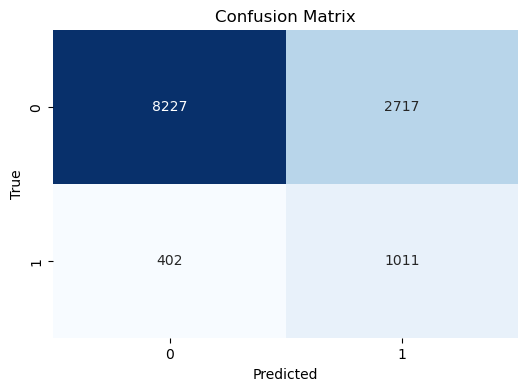

In [41]:
# Print the binary variable
accuracy = accuracy_score(y_teste_2, y_pred_teste_2)
conf_matrix = confusion_matrix(y_teste_2, y_pred_teste_2)
class_report = classification_report(y_teste_2, y_pred_teste_2)
print('TESTE')
print(class_report)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Rede 3

In [42]:
model_3 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(32, activation='relu', input_dim=len(x_treino_2.columns)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
#values=[1e-2, 1e-3, 1e-4]
opt = keras.optimizers.Adam(learning_rate=0.001)

#opt = SGD(lr=0.001)

model_3.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_3.fit(x_treino_2, y_treino_2, batch_size=100, epochs=50)#class_weight=sklearn_weights)#, callbacks=[myCallback()])

#model.evaluate(x_teste_2,  y_teste_2, verbose=2)


Epoch 1/50
289/289 [==============================] - 1s 2ms/step - loss: 0.3551 - accuracy: 0.8852
Epoch 2/50
289/289 [==============================] - 0s 2ms/step - loss: 0.2969 - accuracy: 0.8985
Epoch 3/50
289/289 [==============================] - 0s 1ms/step - loss: 0.2912 - accuracy: 0.8985
Epoch 4/50
289/289 [==============================] - 0s 1ms/step - loss: 0.2919 - accuracy: 0.8974
Epoch 5/50
289/289 [==============================] - 0s 2ms/step - loss: 0.2879 - accuracy: 0.8988
Epoch 6/50
289/289 [==============================] - 0s 1ms/step - loss: 0.2879 - accuracy: 0.8986
Epoch 7/50
289/289 [==============================] - 0s 2ms/step - loss: 0.2893 - accuracy: 0.8976
Epoch 8/50
289/289 [==============================] - 1s 2ms/step - loss: 0.2864 - accuracy: 0.8984
Epoch 9/50
289/289 [==============================] - 1s 2ms/step - loss: 0.2844 - accuracy: 0.8990
Epoch 10/50
289/289 [==============================] - 0s 2ms/step - loss: 0.2835 - accuracy: 0.8994

In [43]:
limiar = 0.07
y_pred_teste_proba_3 = model_3.predict(x_teste_2)
y_pred_teste_3 = [0 if val < limiar else 1 for val in y_pred_teste_proba_3]

y_pred_treino_proba_3 = model_3.predict(x_treino_2)
y_pred_treino_3 = [0 if val < limiar else 1 for val in y_pred_treino_proba_3]

print('ROC AUC Treino: ', roc_auc_score(y_treino_2, y_pred_treino_proba_3))
print('ROC AUC Teste: ', roc_auc_score(y_teste_2, y_pred_teste_proba_3))

  1/387 [..............................] - ETA: 23s

901/901 [==============================] - 1s 904us/step
ROC AUC Treino:  0.8073958571510389
ROC AUC Teste:  0.7908033317916755


In [44]:
# Print the binary variable
accuracy = accuracy_score(y_treino_2, y_pred_treino_3)
conf_matrix = confusion_matrix(y_treino_2, y_pred_treino_3)
class_report = classification_report(y_treino_2, y_pred_treino_3)
print('TREINO')
print(class_report)

TREINO
              precision    recall  f1-score   support

           0       0.96      0.66      0.78     25604
           1       0.22      0.77      0.35      3227

    accuracy                           0.68     28831
   macro avg       0.59      0.72      0.57     28831
weighted avg       0.88      0.68      0.74     28831



TESTE
              precision    recall  f1-score   support

           0       0.95      0.66      0.78     10944
           1       0.22      0.75      0.34      1413

    accuracy                           0.67     12357
   macro avg       0.59      0.70      0.56     12357
weighted avg       0.87      0.67      0.73     12357



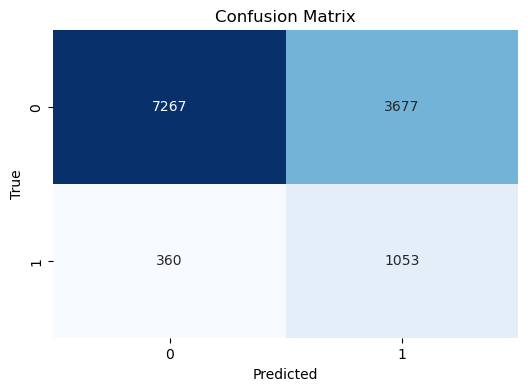

In [46]:
# Print the binary variable
accuracy = accuracy_score(y_teste_2, y_pred_teste_3)
conf_matrix = confusion_matrix(y_teste_2, y_pred_teste_3)
class_report = classification_report(y_teste_2, y_pred_teste_3)
print('TESTE')
print(class_report)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Rede 4

In [47]:
model_4 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(32, activation='relu', input_dim=len(x_treino_2.columns)),
  tf.keras.layers.Dense(50, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

opt = keras.optimizers.Adam(learning_rate=0.02)

#opt = SGD(lr=0.001)

model_4.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_4.fit(x_treino_2, y_treino_2, batch_size=100, epochs=60)#class_weight=sklearn_weights)#, callbacks=[myCallback()])

#model.evaluate(x_teste_2,  y_teste_2, verbose=2)


Epoch 1/60
289/289 [==============================] - 1s 2ms/step - loss: 0.3448 - accuracy: 0.8917
Epoch 2/60
289/289 [==============================] - 0s 1ms/step - loss: 0.2898 - accuracy: 0.8989
Epoch 3/60
289/289 [==============================] - 0s 1ms/step - loss: 0.2882 - accuracy: 0.8992
Epoch 4/60
289/289 [==============================] - 0s 2ms/step - loss: 0.2861 - accuracy: 0.8990
Epoch 5/60
289/289 [==============================] - 0s 1ms/step - loss: 0.2840 - accuracy: 0.8990
Epoch 6/60
289/289 [==============================] - 0s 2ms/step - loss: 0.2838 - accuracy: 0.9000
Epoch 7/60
289/289 [==============================] - 0s 1ms/step - loss: 0.2830 - accuracy: 0.8989
Epoch 8/60
289/289 [==============================] - 0s 1ms/step - loss: 0.2822 - accuracy: 0.8997
Epoch 9/60
289/289 [==============================] - 0s 1ms/step - loss: 0.2830 - accuracy: 0.8990
Epoch 10/60
289/289 [==============================] - 0s 2ms/step - loss: 0.2826 - accuracy: 0.8998

In [48]:
limiar = 0.07
y_pred_teste_proba_4 = model_4.predict(x_teste_2)
y_pred_teste_4 = [0 if val < limiar else 1 for val in y_pred_teste_proba_4]

y_pred_treino_proba_4 = model_4.predict(x_treino_2)
y_pred_treino_4 = [0 if val < limiar else 1 for val in y_pred_treino_proba_4]

print('ROC AUC Treino: ', roc_auc_score(y_treino_2, y_pred_treino_proba_4))
print('ROC AUC Teste: ', roc_auc_score(y_teste_2, y_pred_teste_proba_4))

901/901 [==============================] - 1s 917us/step
ROC AUC Treino:  0.7819217788106105
ROC AUC Teste:  0.7907984817773969


In [49]:
# Print the binary variable
accuracy = accuracy_score(y_treino_2, y_pred_treino_4)
conf_matrix = confusion_matrix(y_treino_2, y_pred_treino_4)
class_report = classification_report(y_treino_2, y_pred_treino_4)
print('TREINO')
print(class_report)

TREINO
              precision    recall  f1-score   support

           0       0.95      0.84      0.89     25604
           1       0.33      0.64      0.44      3227

    accuracy                           0.81     28831
   macro avg       0.64      0.74      0.66     28831
weighted avg       0.88      0.81      0.84     28831



TESTE
              precision    recall  f1-score   support

           0       0.95      0.84      0.89     10944
           1       0.34      0.65      0.45      1413

    accuracy                           0.82     12357
   macro avg       0.65      0.74      0.67     12357
weighted avg       0.88      0.82      0.84     12357



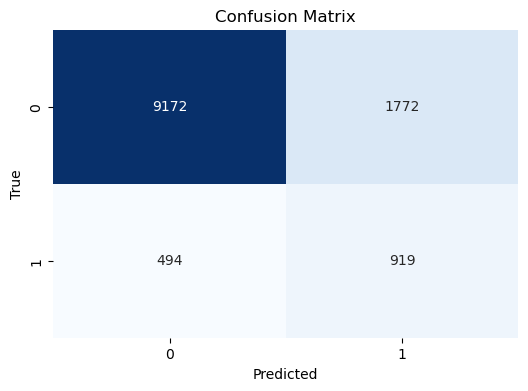

In [50]:
# Print the binary variable
accuracy = accuracy_score(y_teste_2, y_pred_teste_4)
conf_matrix = confusion_matrix(y_teste_2, y_pred_teste_4)
class_report = classification_report(y_teste_2, y_pred_teste_4)
print('TESTE')
print(class_report)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Rede 5

In [51]:
model_5 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(16, activation='relu', input_dim=len(x_treino_2.columns)),
  tf.keras.layers.Dense(32, activation='relu'),
 # tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

opt = keras.optimizers.Adam(learning_rate=0.002)

#opt = SGD(lr=0.001)

model_5.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_5.fit(x_treino_2, y_treino_2, batch_size=100, epochs=50)#class_weight=sklearn_weights)#, callbacks=[myCallback()])

#model.evaluate(x_teste_2,  y_teste_2, verbose=2)


Epoch 1/50
289/289 [==============================] - 1s 1ms/step - loss: 0.3361 - accuracy: 0.8816
Epoch 2/50
289/289 [==============================] - 0s 1ms/step - loss: 0.2968 - accuracy: 0.8959
Epoch 3/50
289/289 [==============================] - 0s 2ms/step - loss: 0.2921 - accuracy: 0.8980
Epoch 4/50
289/289 [==============================] - 0s 1ms/step - loss: 0.2895 - accuracy: 0.8988
Epoch 5/50
289/289 [==============================] - 0s 1ms/step - loss: 0.2907 - accuracy: 0.8986
Epoch 6/50
289/289 [==============================] - 0s 1ms/step - loss: 0.2866 - accuracy: 0.8987
Epoch 7/50
289/289 [==============================] - 0s 1ms/step - loss: 0.2884 - accuracy: 0.8983
Epoch 8/50
289/289 [==============================] - 0s 1ms/step - loss: 0.2848 - accuracy: 0.8995
Epoch 9/50
289/289 [==============================] - 0s 1ms/step - loss: 0.2859 - accuracy: 0.8986
Epoch 10/50
289/289 [==============================] - 0s 1ms/step - loss: 0.2845 - accuracy: 0.8979

In [52]:
limiar = 0.07
y_pred_teste_proba_5 = model_5.predict(x_teste_2)
y_pred_teste_5 = [0 if val < limiar else 1 for val in y_pred_teste_proba_5]

y_pred_treino_proba_5 = model_5.predict(x_treino_2)
y_pred_treino_5 = [0 if val < limiar else 1 for val in y_pred_treino_proba_5]

print('ROC AUC Treino: ', roc_auc_score(y_treino_2, y_pred_treino_proba_5))
print('ROC AUC Teste: ', roc_auc_score(y_teste_2, y_pred_teste_proba_5))

  1/387 [..............................] - ETA: 23s

901/901 [==============================] - 1s 894us/step
ROC AUC Treino:  0.7955999052964058
ROC AUC Teste:  0.8021591552232197


In [53]:
# Print the binary variable
accuracy = accuracy_score(y_treino_2, y_pred_treino_5)
conf_matrix = confusion_matrix(y_treino_2, y_pred_treino_5)
class_report = classification_report(y_treino_2, y_pred_treino_5)
print('TREINO')
print(class_report)

TREINO
              precision    recall  f1-score   support

           0       0.96      0.63      0.76     25604
           1       0.21      0.78      0.33      3227

    accuracy                           0.64     28831
   macro avg       0.58      0.70      0.54     28831
weighted avg       0.87      0.64      0.71     28831



TESTE
              precision    recall  f1-score   support

           0       0.96      0.63      0.76     10944
           1       0.22      0.79      0.34      1413

    accuracy                           0.65     12357
   macro avg       0.59      0.71      0.55     12357
weighted avg       0.87      0.65      0.72     12357



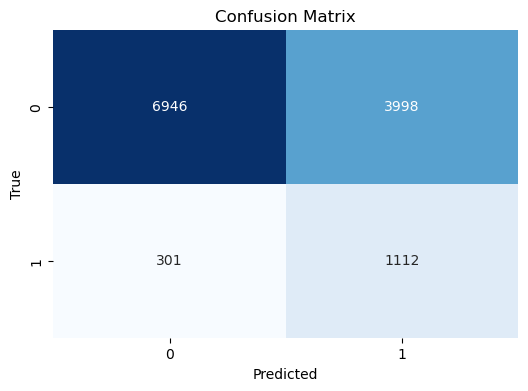

In [54]:
# Print the binary variable
accuracy = accuracy_score(y_teste_2, y_pred_teste_5)
conf_matrix = confusion_matrix(y_teste_2, y_pred_teste_5)
class_report = classification_report(y_teste_2, y_pred_teste_5)
print('TESTE')
print(class_report)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Comparação AUC Redes

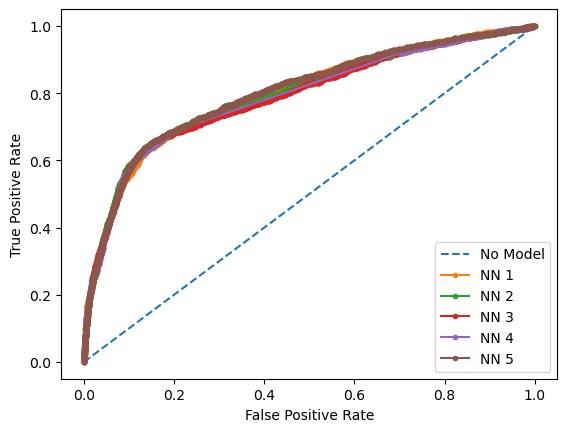

In [55]:

 
dc_auc_1 = roc_auc_score(y_teste_2, y_pred_teste_proba_1)
dc_auc_2 = roc_auc_score(y_teste_2, y_pred_teste_proba_2)
dc_auc_3 = roc_auc_score(y_teste_2, y_pred_teste_proba_3)
dc_auc_4 = roc_auc_score(y_teste_2, y_pred_teste_proba_4)
dc_auc_5 = roc_auc_score(y_teste_2, y_pred_teste_proba_5)
ns_probs = [0 for _ in range(len(y_teste_2))]
# summarize scores
#print('Neural Network: ROC AUC=%.3f' % (nn_auc))
#print('Decision Tree: ROC AUC=%.3f' % (dc_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_teste_2, ns_probs)

dt_fpr_1, dt_tpr_1, _ = roc_curve(y_teste_2, y_pred_teste_proba_1)
dt_fpr_2, dt_tpr_2, _ = roc_curve(y_teste_2, y_pred_teste_proba_2)
dt_fpr_3, dt_tpr_3, _ = roc_curve(y_teste_2, y_pred_teste_proba_3)
dt_fpr_4, dt_tpr_4, _ = roc_curve(y_teste_2, y_pred_teste_proba_4)
dt_fpr_5, dt_tpr_5, _ = roc_curve(y_teste_2, y_pred_teste_proba_5)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Model')
plt.plot(dt_fpr_1, dt_tpr_1, marker='.', label='NN 1')
plt.plot(dt_fpr_2, dt_tpr_2, marker='.', label='NN 2')
plt.plot(dt_fpr_3, dt_tpr_3, marker='.', label='NN 3')
plt.plot(dt_fpr_4, dt_tpr_4, marker='.', label='NN 4')
plt.plot(dt_fpr_5, dt_tpr_5, marker='.', label='NN 5')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

## Comparação Métricas Redes e Árvores

Neural Network: ROC AUC=0.802
Decision Tree: ROC AUC=0.790
LIGHT GBM: ROC AUC=0.810


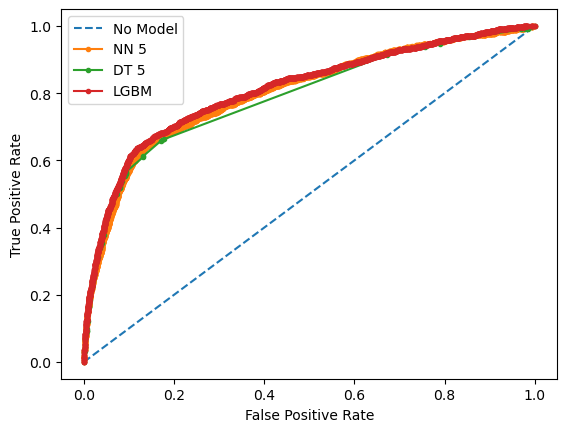

In [56]:

 

dc_auc_5 = roc_auc_score(y_teste, y_pred_teste_dt_5)
nn_auc_5 = roc_auc_score(y_teste_2, y_pred_teste_proba_5)

lgb_auc_5 = roc_auc_score(y_teste, y_pred_teste_lgb_1)

ns_probs = [0 for _ in range(len(y_teste))]
# summarize scores
print('Neural Network: ROC AUC=%.3f' % (nn_auc_5))
print('Decision Tree: ROC AUC=%.3f' % (dc_auc_5))
print('LIGHT GBM: ROC AUC=%.3f' % (lgb_auc_5))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_teste, ns_probs)


dt_fpr_5, dt_tpr_5, _ = roc_curve(y_teste, y_pred_teste_dt_5)
dt_fpr_5_nn, dt_tpr_5_nn, _ = roc_curve(y_teste_2, y_pred_teste_proba_5)
dt_fpr_5_lgb, dt_tpr_5_lgb, _ = roc_curve(y_teste, y_pred_teste_lgb_1)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Model')
plt.plot(dt_fpr_5_nn, dt_tpr_5_nn, marker='.', label='NN 5')
plt.plot(dt_fpr_5, dt_tpr_5, marker='.', label='DT 5')
plt.plot(dt_fpr_5_lgb, dt_tpr_5_lgb, marker='.', label='LGBM')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
# Montar plano de testes para hiperparâmetros na rede
# Testar outo algoritmo, que é bom para classes desbalanceadas
# Comparar Recall dos algoritmos selecionados

In [160]:
teste = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
teste

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [162]:
teste['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64